In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
# model_log_prefix = "../../bats_transformer/outputs/test/models_31"
# input_data_folder = "../../bats_transformer/data/daytime_files_new/splits"
model_log_prefix = "../../bats_transformer/outputs/laci_daytime_10_15/model_31"
input_data_folder = "../../bats_transformer/data/filter_test/splits"

In [4]:
truths = pd.read_csv(f"{model_log_prefix}_ground_truths.log")
predictions = pd.read_csv(f"{model_log_prefix}_predictions.log")
losses = pd.read_csv(f"{model_log_prefix}_losses.log")
losses

,Unnamed: 0,TimeIndex,TimeInFile,PrecedingIntrvl,HiFreq,Bndwdth,FreqMaxPwr,PrcntMaxAmpDur,FreqKnee,PrcntKneeDur,...,UpprKnFreq,HiFtoUpprKnAmp,HiFtoKnAmp,HiFtoFcAmp,UpprKnToKnAmp,KnToFcAmp,LdgToFcAmp,file_id,chirp_idx,model_id
0,0,1.678744,0.027789,0.455325,2.107049,2.250587,1.376850,1.442475,1.455131,0.001927,...,1.131654,0.014622,0.002179,0.789387,0.114628,0.612384,0.395073,494.0,11.0,models/laci_daytime_10_15/model_31
1,1,1.678744,0.013568,0.011038,0.200133,0.120783,0.699827,0.112844,0.145492,0.000002,...,0.001049,0.018311,0.056550,12.120804,0.544411,10.167120,7.658800,494.0,10.0,models/laci_daytime_10_15/model_31
2,2,1.678744,0.013836,0.347735,0.471848,0.028822,0.102718,1.035062,0.025887,0.339418,...,0.046463,0.031194,0.006730,2.736424,0.072329,0.026014,0.056710,494.0,9.0,models/laci_daytime_10_15/model_31
3,3,1.678744,0.000270,0.152853,1.254702,2.050963,0.780930,0.118894,0.558298,0.001903,...,1.045674,0.003778,0.004746,0.018449,0.813276,0.134312,0.046029,494.0,8.0,models/laci_daytime_10_15/model_31
4,4,1.678744,0.089787,0.000012,1.731076,2.578008,1.436197,1.204909,1.315042,0.016101,...,1.413320,0.005029,0.042923,4.296138,9.546323,4.894458,3.706541,494.0,7.0,models/laci_daytime_10_15/model_31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,190,1.678744,0.088620,0.016829,0.730119,1.882287,0.062881,1.075286,0.518919,0.054150,...,2.051006,0.163168,0.180868,0.066132,0.557251,0.226125,0.149779,511.0,10.0,models/laci_daytime_10_15/model_31
191,191,1.678744,0.047638,0.043845,1.981615,3.557336,0.615724,0.210049,0.838407,0.218751,...,0.978585,0.261047,0.134706,0.107696,1.315003,0.649979,0.654494,511.0,9.0,models/laci_daytime_10_15/model_31
192,192,1.678744,0.304571,0.023783,0.925915,2.672988,1.346533,0.262531,0.991342,0.016027,...,0.396100,0.033762,0.234509,1.009839,5.511491,1.862828,1.405512,511.0,8.0,models/laci_daytime_10_15/model_31
193,193,1.678744,0.009720,0.604319,1.575602,1.763038,0.575069,2.116058,1.005349,0.509090,...,3.028963,0.081513,0.042002,0.075704,0.541584,0.235345,0.072564,511.0,7.0,models/laci_daytime_10_15/model_31


In [5]:
for df in [truths, predictions, losses]:
    df.drop(columns=["Unnamed: 0", "model_id"], inplace=True)

In [6]:
predicted_cols = losses.loc[:, 'TimeInFile':'LdgToFcAmp']
predicted_cols

,TimeInFile,PrecedingIntrvl,HiFreq,Bndwdth,FreqMaxPwr,PrcntMaxAmpDur,FreqKnee,PrcntKneeDur,StartF,FreqCtr,...,Amp3rdQrtl,Amp4thQrtl,AmpK@start,UpprKnFreq,HiFtoUpprKnAmp,HiFtoKnAmp,HiFtoFcAmp,UpprKnToKnAmp,KnToFcAmp,LdgToFcAmp
0,0.027789,0.455325,2.107049,2.250587,1.376850,1.442475,1.455131,0.001927,1.952786,2.775916,...,0.006329,0.036532,0.208975,1.131654,0.014622,0.002179,0.789387,0.114628,0.612384,0.395073
1,0.013568,0.011038,0.200133,0.120783,0.699827,0.112844,0.145492,0.000002,0.094511,0.104382,...,3.064373,1.208057,0.049532,0.001049,0.018311,0.056550,12.120804,0.544411,10.167120,7.658800
2,0.013836,0.347735,0.471848,0.028822,0.102718,1.035062,0.025887,0.339418,0.091812,0.139847,...,1.096868,0.393437,0.760621,0.046463,0.031194,0.006730,2.736424,0.072329,0.026014,0.056710
3,0.000270,0.152853,1.254702,2.050963,0.780930,0.118894,0.558298,0.001903,1.378903,0.907243,...,0.122023,0.104605,0.001488,1.045674,0.003778,0.004746,0.018449,0.813276,0.134312,0.046029
4,0.089787,0.000012,1.731076,2.578008,1.436197,1.204909,1.315042,0.016101,3.077683,1.724558,...,0.857434,2.912133,0.005181,1.413320,0.005029,0.042923,4.296138,9.546323,4.894458,3.706541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.088620,0.016829,0.730119,1.882287,0.062881,1.075286,0.518919,0.054150,1.042478,1.292116,...,0.012956,0.286844,0.061258,2.051006,0.163168,0.180868,0.066132,0.557251,0.226125,0.149779
191,0.047638,0.043845,1.981615,3.557336,0.615724,0.210049,0.838407,0.218751,2.197597,1.545093,...,1.842581,1.181337,0.010801,0.978585,0.261047,0.134706,0.107696,1.315003,0.649979,0.654494
192,0.304571,0.023783,0.925915,2.672988,1.346533,0.262531,0.991342,0.016027,1.322563,0.580573,...,0.110523,0.535459,0.045860,0.396100,0.033762,0.234509,1.009839,5.511491,1.862828,1.405512
193,0.009720,0.604319,1.575602,1.763038,0.575069,2.116058,1.005349,0.509090,2.555580,2.010956,...,0.362810,0.951479,0.682879,3.028963,0.081513,0.042002,0.075704,0.541584,0.235345,0.072564


In [7]:
average_errors = predicted_cols.mean()
average_errors

TimeInFile         0.160544
PrecedingIntrvl    0.420801
HiFreq             1.073263
Bndwdth            1.292759
FreqMaxPwr         0.956037
PrcntMaxAmpDur     1.069794
FreqKnee           1.212001
PrcntKneeDur       0.474186
StartF             1.099327
FreqCtr            1.130056
FFwd32dB           1.194167
FFwd20dB           1.050260
FFwd15dB           1.112650
FBak5dB            1.208945
FFwd5dB            1.127067
Bndw32dB           1.238735
Amp1stQrtl         0.964710
Amp2ndQrtl         0.920123
Amp3rdQrtl         0.805434
Amp4thQrtl         0.965542
AmpK@start         2.245210
UpprKnFreq         1.174788
HiFtoUpprKnAmp     0.074953
HiFtoKnAmp         0.066563
HiFtoFcAmp         0.249494
UpprKnToKnAmp      0.603026
KnToFcAmp          0.448968
LdgToFcAmp         0.275098
dtype: float64

Text(0, 0.5, 'Frequency')

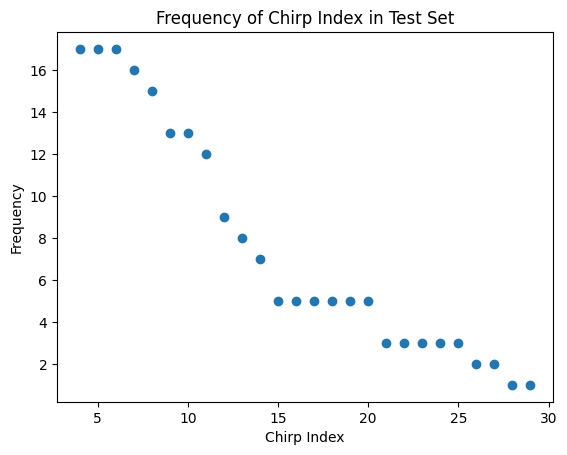

In [18]:
# plot of the frequency of chirp index in the test set
chirp_idx_counts = losses.value_counts("chirp_idx")
plt.scatter(chirp_idx_counts.index, chirp_idx_counts.values)
plt.title("Frequency of Chirp Index in Test Set")
plt.xlabel("Chirp Index")
plt.ylabel("Frequency")

In [9]:
# average the losses by chirp index
average_losses_by_chirp = losses.groupby("chirp_idx").mean()
average_losses_by_chirp

,TimeIndex,TimeInFile,PrecedingIntrvl,HiFreq,Bndwdth,FreqMaxPwr,PrcntMaxAmpDur,FreqKnee,PrcntKneeDur,StartF,...,Amp4thQrtl,AmpK@start,UpprKnFreq,HiFtoUpprKnAmp,HiFtoKnAmp,HiFtoFcAmp,UpprKnToKnAmp,KnToFcAmp,LdgToFcAmp,file_id
chirp_idx,,,,,,,,,,,,,,,,,,,,,
4.0,1.678744,0.156525,0.106119,0.742238,0.929920,0.570707,0.935372,1.607472,0.876372,0.694345,...,1.165259,0.811902,1.072864,0.062693,0.063746,0.089809,0.167808,0.174741,0.099730,502.000000
5.0,1.678744,0.122966,0.673204,0.712927,0.538165,1.042174,0.934393,1.009830,0.586145,0.807309,...,0.796448,4.700999,0.932104,0.045450,0.036289,0.105065,0.450273,0.250993,0.188938,502.000000
6.0,1.678744,0.081224,0.250160,1.088388,1.351202,1.363407,0.898883,1.230849,0.123378,1.133945,...,0.909325,0.267727,1.082941,0.055978,0.072190,0.097064,0.727616,0.486932,0.092220,502.764706
7.0,1.678744,0.161286,0.242028,0.913538,0.969203,0.827112,1.532566,0.809361,0.221881,1.145117,...,1.388247,7.936747,1.125702,0.054305,0.039938,0.349139,0.989755,0.531936,0.361374,502.687500
8.0,1.678744,0.065944,0.292006,1.086829,1.370031,1.155681,0.973822,1.261847,0.295113,1.114178,...,0.594860,5.377273,1.309968,0.054319,0.054821,0.261101,0.925206,0.502885,0.282303,502.800000
9.0,1.678744,0.113573,1.104974,0.625842,0.843728,0.552942,0.638337,0.716194,0.099669,0.562011,...,1.172087,0.219468,0.588532,0.073798,0.062162,0.293962,0.422787,0.351244,0.108774,503.615385
10.0,1.678744,0.099802,0.532108,0.821769,1.156495,0.759370,0.954932,0.671055,0.211458,0.694663,...,1.265503,0.917109,0.880249,0.076091,0.058637,1.003092,0.479223,0.954829,0.694138,503.615385
11.0,1.678744,0.176838,1.938437,1.422556,1.601040,1.436232,1.354864,1.452593,0.304309,1.542455,...,0.442980,0.164246,1.592523,0.075944,0.092573,0.165292,0.495344,0.262942,0.116514,503.666667
12.0,1.678744,0.253135,0.351818,1.358937,1.707742,0.672428,0.970187,1.562570,0.635583,1.650420,...,0.741783,0.311863,1.674793,0.066416,0.043940,0.144748,0.418929,0.155486,0.070321,506.444444


Text(0, 0.5, 'Average Squared Error')

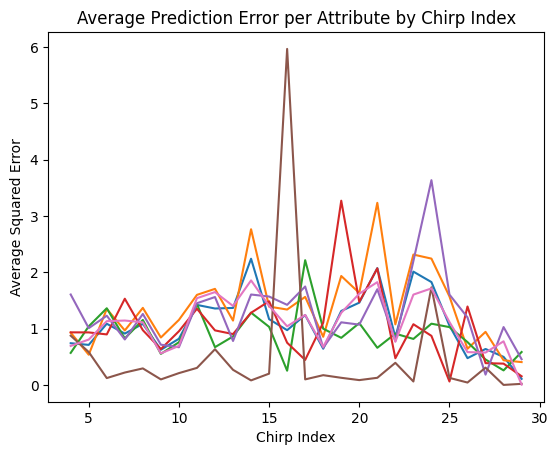

In [19]:
plt.plot(average_losses_by_chirp.index, average_losses_by_chirp.loc[:, 'HiFreq':'StartF'])
plt.title("Average Prediction Error per Attribute by Chirp Index")
plt.xlabel("Chirp Index")
plt.ylabel("Average Squared Error")

In [11]:
filename_to_id = input_data_folder + "/split_filename_to_id.csv"

In [12]:
# map file index to species
filename_to_id_df = pd.read_csv(filename_to_id)
filename_to_id_df["species"] = filename_to_id_df["Filename"].apply(lambda x: x.split("-")[1].split(".")[0] if len(x.split("-")) > 1 else None)
filename_to_id_df

,Filename,file_id,species
0,barn1_D20220702T190427m046-Laci.wav,0,Laci
1,barn1_D20220702T191116m026-Laci.wav,1,Laci
2,barn1_D20220702T191217m360-Laci.wav,2,Laci
3,barn1_D20220702T191334m671-Laci.wav,3,Laci
4,barn1_D20220702T192056m379-Laci.wav,4,Laci
...,...,...,...
507,barn1_D20220723T195743m374-Laci.wav,507,Laci
508,barn1_D20220723T200111m270-Laci.wav,508,Laci
509,barn1_D20220723T200510m355-Laci.wav,509,Laci
510,barn1_D20220723T200754m949-Laci.wav,510,Laci


<BarContainer object of 1 artists>

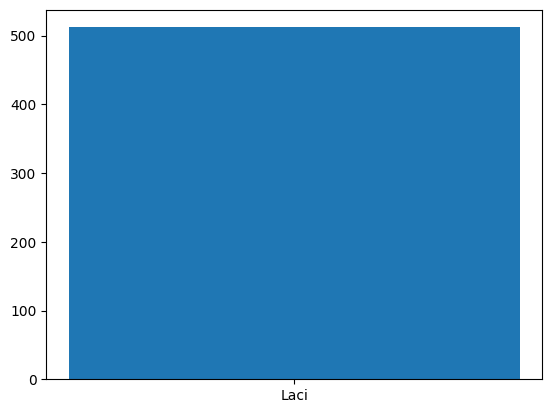

In [13]:
species_counts = filename_to_id_df.value_counts("species")
plt.bar(species_counts.index, species_counts.values)

In [14]:
laci_file_indices = filename_to_id_df.loc[filename_to_id_df["species"] == "Laci", "file_id"].tolist()
coto_file_indices = filename_to_id_df.loc[filename_to_id_df["species"] == "Coto", "file_id"].tolist()
laci_file_indices

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [15]:
laci_losses = losses[losses["file_id"].isin(laci_file_indices)]
laci_losses

,TimeIndex,TimeInFile,PrecedingIntrvl,HiFreq,Bndwdth,FreqMaxPwr,PrcntMaxAmpDur,FreqKnee,PrcntKneeDur,StartF,...,AmpK@start,UpprKnFreq,HiFtoUpprKnAmp,HiFtoKnAmp,HiFtoFcAmp,UpprKnToKnAmp,KnToFcAmp,LdgToFcAmp,file_id,chirp_idx
0,1.678744,0.027789,0.455325,2.107049,2.250587,1.376850,1.442475,1.455131,0.001927,1.952786,...,0.208975,1.131654,0.014622,0.002179,0.789387,0.114628,0.612384,0.395073,494.0,11.0
1,1.678744,0.013568,0.011038,0.200133,0.120783,0.699827,0.112844,0.145492,0.000002,0.094511,...,0.049532,0.001049,0.018311,0.056550,12.120804,0.544411,10.167120,7.658800,494.0,10.0
2,1.678744,0.013836,0.347735,0.471848,0.028822,0.102718,1.035062,0.025887,0.339418,0.091812,...,0.760621,0.046463,0.031194,0.006730,2.736424,0.072329,0.026014,0.056710,494.0,9.0
3,1.678744,0.000270,0.152853,1.254702,2.050963,0.780930,0.118894,0.558298,0.001903,1.378903,...,0.001488,1.045674,0.003778,0.004746,0.018449,0.813276,0.134312,0.046029,494.0,8.0
4,1.678744,0.089787,0.000012,1.731076,2.578008,1.436197,1.204909,1.315042,0.016101,3.077683,...,0.005181,1.413320,0.005029,0.042923,4.296138,9.546323,4.894458,3.706541,494.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,1.678744,0.088620,0.016829,0.730119,1.882287,0.062881,1.075286,0.518919,0.054150,1.042478,...,0.061258,2.051006,0.163168,0.180868,0.066132,0.557251,0.226125,0.149779,511.0,10.0
191,1.678744,0.047638,0.043845,1.981615,3.557336,0.615724,0.210049,0.838407,0.218751,2.197597,...,0.010801,0.978585,0.261047,0.134706,0.107696,1.315003,0.649979,0.654494,511.0,9.0
192,1.678744,0.304571,0.023783,0.925915,2.672988,1.346533,0.262531,0.991342,0.016027,1.322563,...,0.045860,0.396100,0.033762,0.234509,1.009839,5.511491,1.862828,1.405512,511.0,8.0
193,1.678744,0.009720,0.604319,1.575602,1.763038,0.575069,2.116058,1.005349,0.509090,2.555580,...,0.682879,3.028963,0.081513,0.042002,0.075704,0.541584,0.235345,0.072564,511.0,7.0


In [16]:
laci_predicted_cols = laci_losses.loc[:, 'TimeInFile':'LdgToFcAmp']
laci_average_errors = laci_predicted_cols.mean()
laci_average_errors

TimeInFile         0.160544
PrecedingIntrvl    0.420801
HiFreq             1.073263
Bndwdth            1.292759
FreqMaxPwr         0.956037
PrcntMaxAmpDur     1.069794
FreqKnee           1.212001
PrcntKneeDur       0.474186
StartF             1.099327
FreqCtr            1.130056
FFwd32dB           1.194167
FFwd20dB           1.050260
FFwd15dB           1.112650
FBak5dB            1.208945
FFwd5dB            1.127067
Bndw32dB           1.238735
Amp1stQrtl         0.964710
Amp2ndQrtl         0.920123
Amp3rdQrtl         0.805434
Amp4thQrtl         0.965542
AmpK@start         2.245210
UpprKnFreq         1.174788
HiFtoUpprKnAmp     0.074953
HiFtoKnAmp         0.066563
HiFtoFcAmp         0.249494
UpprKnToKnAmp      0.603026
KnToFcAmp          0.448968
LdgToFcAmp         0.275098
dtype: float64